<a href="https://colab.research.google.com/github/mflawupgrad/CNN_assignment/blob/main/Assignment_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : LAW MAN FAI

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

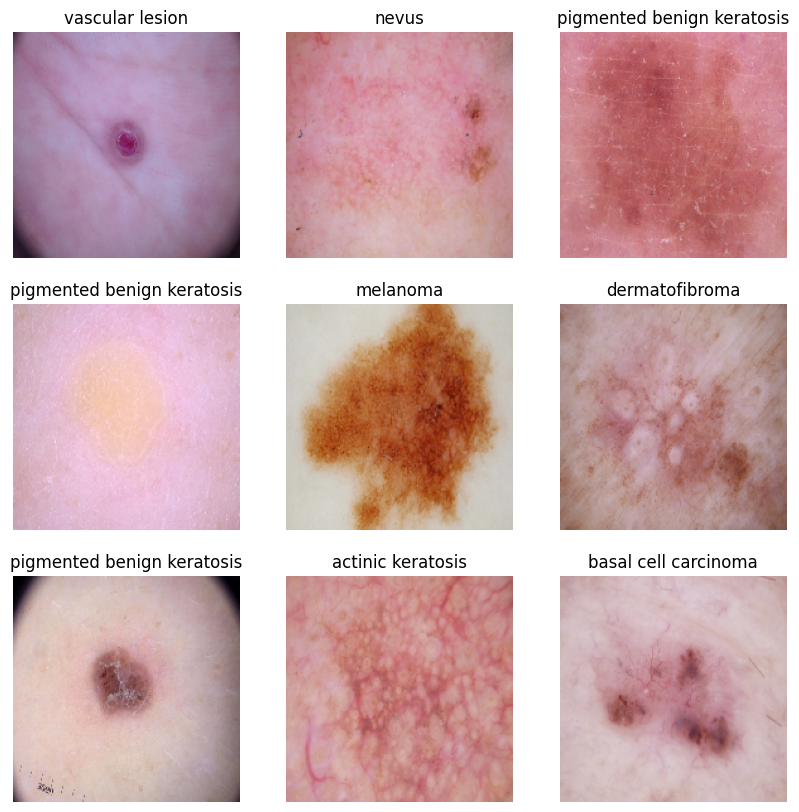

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 270s 1s/step - loss: 1.9857 - accuracy: 0.2612 - val_loss: 1.6933 - val_accuracy: 0.4228
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.7050 - accuracy: 0.3778 - val_loss: 1.5683 - val_accuracy: 0.4362
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4957 - accuracy: 0.4732 - val_loss: 1.4666 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3862 - accuracy: 0.5140 - val_loss: 1.4330 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3290 - accuracy: 0.5346 - val_loss: 1.4219 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1848 - accuracy: 0.5904 - val_loss: 1.3529 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1136 - accuracy: 0.6155 - val_loss: 1.3218 - val_accuracy: 0.5302
Epoch 8/20
56/56 [======

### Visualizing training results

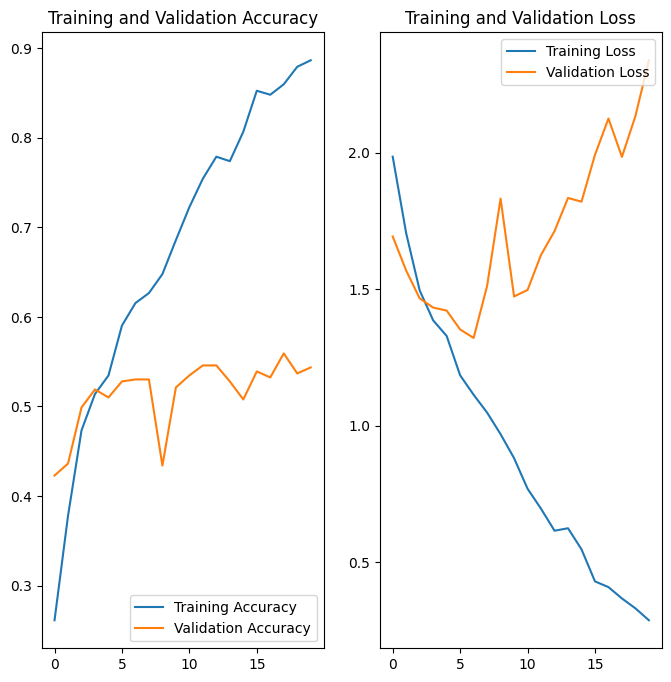

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Answer: The model has achieved only around 55% accuracy on the validation set but 95% accuracy, it is overfitting.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1, fill_mode='reflect'),
    layers.RandomZoom(0.1),
  ]
)

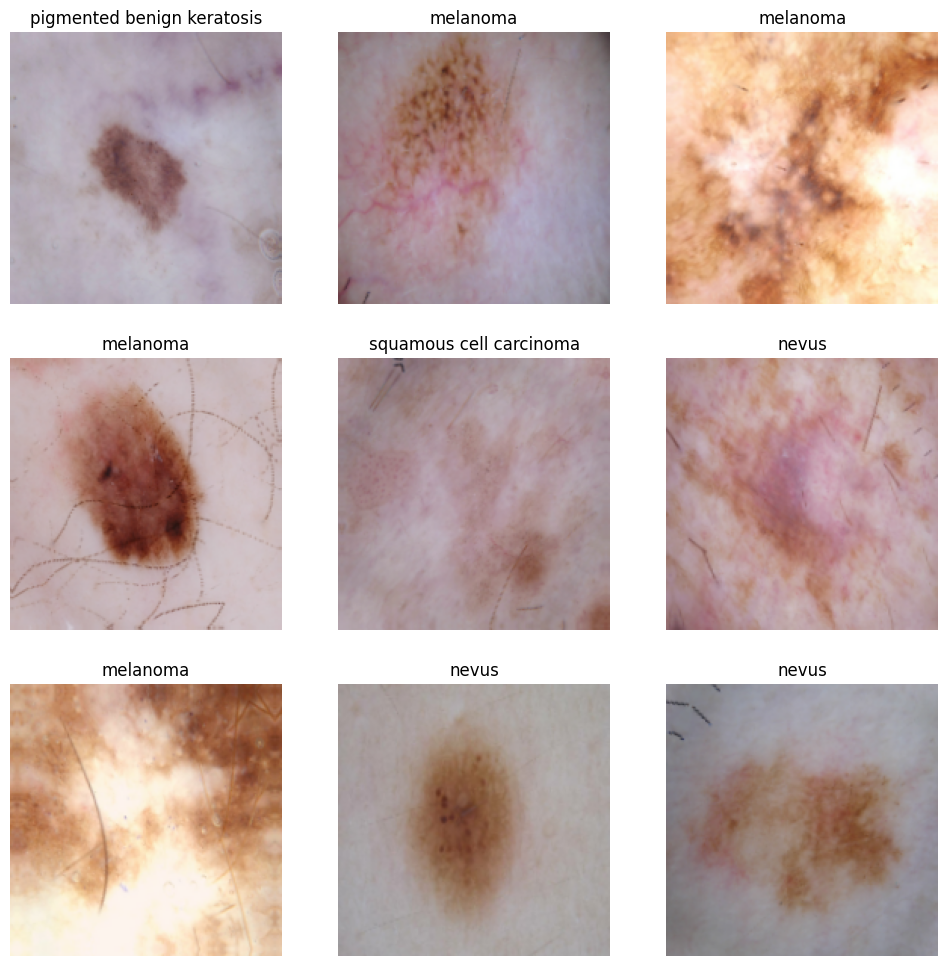

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 34ms/step - loss: 2.1163 - accuracy: 0.2411 - val_loss: 1.9311 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 2s 27ms/step - loss: 1.7640 - accuracy: 0.3633 - val_loss: 1.6891 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.6074 - accuracy: 0.4392 - val_loss: 1.5913 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 2s 27ms/step - loss: 1.5095 - accuracy: 0.4548 - val_loss: 1.5287 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 1s 27ms/step - loss: 1.4821 - accuracy: 0.4771 - val_loss: 1.4654 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 1s 27ms/step - loss: 1.3982 - accuracy: 0.5100 - val_loss: 1.4610 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3602 - accuracy: 0.5223 - val_loss: 1.4314 - val_accuracy: 0.4877
Epoch 8/20
56

### Visualizing the results

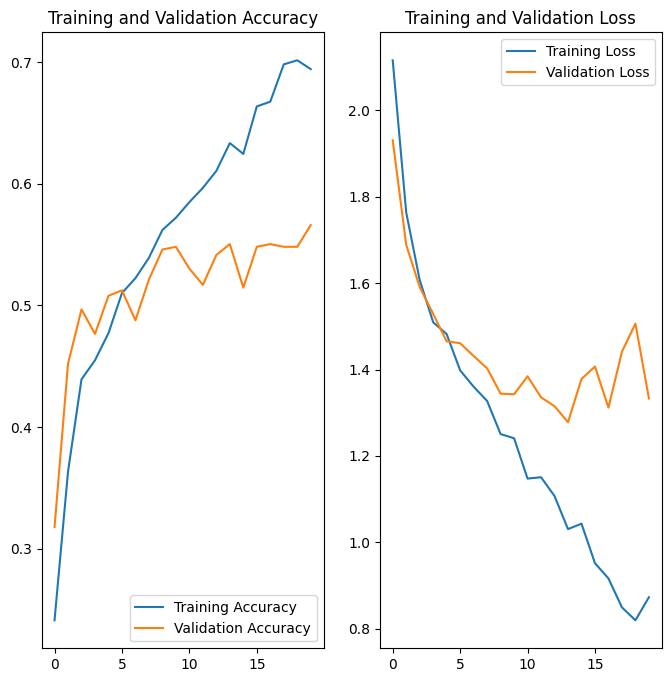

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Answer: ovewfit is still exist but the loss is few.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

path_list += [x for x in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
lesion_list += [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_test, '*', '*.jpg'))]


df_dict_org = dict(zip(path_list, lesion_list))
org_df = pd.DataFrame(list(df_dict_org.items()),columns = ['Path','Label'])
org_df

,Path,Label
0,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
1,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
2,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
3,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
4,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
...,...,...
2352,/content/gdrive/My Drive/CNN_assignment/Skin c...,squamous cell carcinoma
2353,/content/gdrive/My Drive/CNN_assignment/Skin c...,squamous cell carcinoma
2354,/content/gdrive/My Drive/CNN_assignment/Skin c...,vascular lesion
2355,/content/gdrive/My Drive/CNN_assignment/Skin c...,vascular lesion


In [25]:
len(df_dict_org)



2357

<BarContainer object of 9 artists>

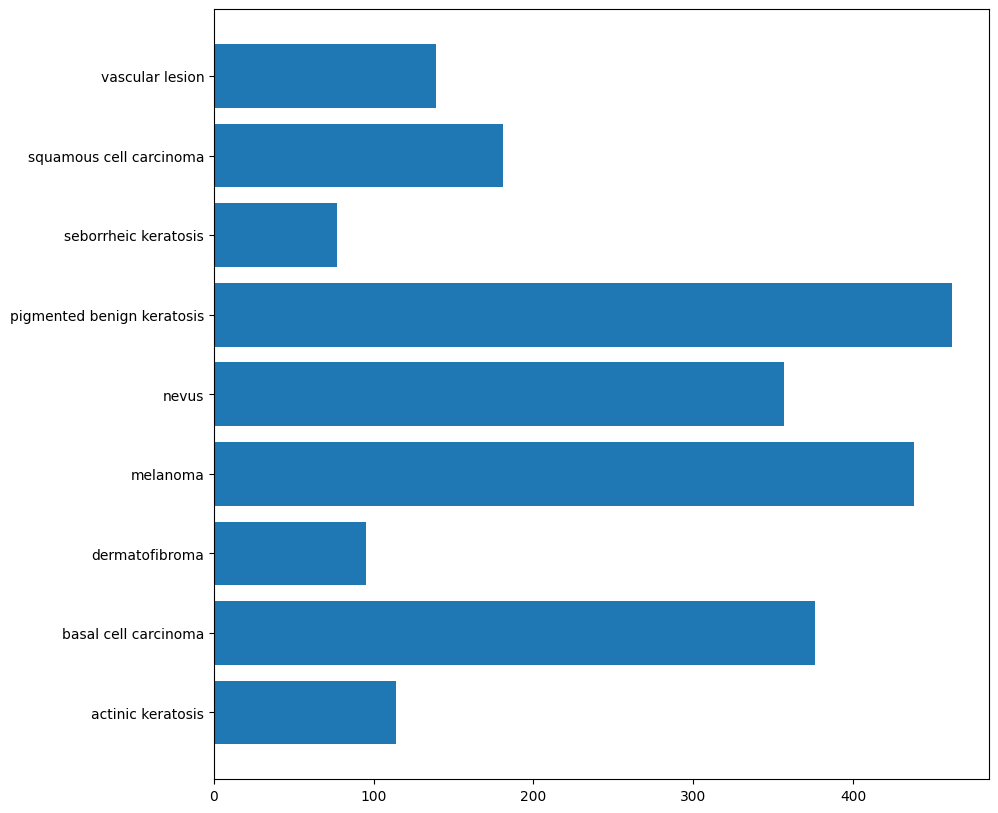

In [26]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(10,10))
plt.barh(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?


#### - Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- seborrtheic keratosis has least number of samples

Answer-2:- pigmented benign keratosis and
melanoma have proprtionate number of classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
path_to_training_dataset="/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    #p = Augmentor.Pipeline(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='/content/gdrive/My Drive/CNN_assignment/Augmentor/'+i+'/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/actinic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE56B90BA60>: 100%|██████████| 500/500 [00:25<00:00, 19.57 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/basal cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE56B973160>: 100%|██████████| 500/500 [00:26<00:00, 18.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/dermatofibroma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DE5A0053280>: 100%|██████████| 500/500 [00:20<00:00, 24.50 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/melanoma/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DE5A0025360>: 100%|██████████| 500/500 [01:30<00:00,  5.54 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/nevus/.

Processing <PIL.Image.Image image mode=RGB size=2117x1988 at 0x7DE5B3F36F80>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/pigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE5BB4DBF40>: 100%|██████████| 500/500 [00:19<00:00, 26.30 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/seborrheic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DE5A01CFE20>: 100%|██████████| 500/500 [00:44<00:00, 11.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/squamous cell carcinoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DE5C1432CE0>: 100%|██████████| 500/500 [00:19<00:00, 25.31 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Augmentor/vascular lesion/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE5B0708F40>: 100%|██████████| 500/500 [00:20<00:00, 24.88 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
data_dir_train_aug = pathlib.Path('/content/gdrive/My Drive/CNN_assignment/Augmentor/')


In [30]:

image_count_train = len(list(data_dir_train_aug.glob('*/*.jpg')))
print(image_count_train)

4500


In [31]:
%cd '/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data'

/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data


In [32]:
# copy orginal train and augmented data into another folder

%cd '/content/gdrive/My Drive/CNN_assignment/Augmentor/'
%cp -av * '/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data/' >> /dev/null

/content/gdrive/My Drive/CNN_assignment/Augmentor


In [33]:
%cd '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
%cp -av * '/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data' >> /dev/null

/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train


In [34]:
%cd '/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data'
%ls

/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data
'actinic keratosis'/     'pigmented benign keratosis'/
'basal cell carcinoma'/  'seborrheic keratosis'/
 dermatofibroma/         'squamous cell carcinoma'/
 melanoma/               'vascular lesion'/
 nevus/


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
data_dir_train_aug='/content/gdrive/My Drive/CNN_assignment/Org_With_Aug_Data/'
path_list_new = [x for x in glob(os.path.join(data_dir_train_aug, '*', '*.jpg'))]
len(path_list_new)

6739

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train_aug, '*', '*.jpg'))]
len(lesion_list_new)


6739

In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = org_df.append(df2)
new_df=pd.concat([org_df, df2], ignore_index=True)



In [39]:
new_df['Label'].value_counts()

pigmented benign keratosis    1440
melanoma                      1392
basal cell carcinoma          1268
nevus                         1230
squamous cell carcinoma        878
vascular lesion                781
actinic keratosis              744
dermatofibroma                 706
seborrheic keratosis           657
Name: Label, dtype: int64

<Axes: >

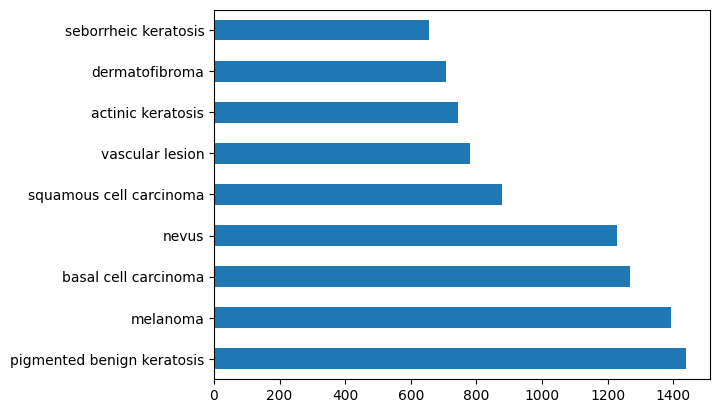

In [40]:
CountStatus = new_df.value_counts(new_df['Label'].values, sort=True)

CountStatus.plot.barh()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [42]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [44]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [45]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [47]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 52s 90ms/step - loss: 2.0341 - accuracy: 0.2353 - val_loss: 1.6859 - val_accuracy: 0.3712
Epoch 2/50
169/169 [==============================] - 5s 27ms/step - loss: 1.5891 - accuracy: 0.3950 - val_loss: 1.4850 - val_accuracy: 0.4506
Epoch 3/50
169/169 [==============================] - 5s 28ms/step - loss: 1.3909 - accuracy: 0.4685 - val_loss: 1.4362 - val_accuracy: 0.4692
Epoch 4/50
169/169 [==============================] - 5s 27ms/step - loss: 1.2638 - accuracy: 0.5213 - val_loss: 1.2674 - val_accuracy: 0.5011
Epoch 5/50
169/169 [==============================] - 5s 27ms/step - loss: 1.1628 - accuracy: 0.5564 - val_loss: 1.1236 - val_accuracy: 0.6028
Epoch 6/50
169/169 [==============================] - 5s 28ms/step - loss: 0.9921 - accuracy: 0.6246 - val_loss: 1.0215 - val_accuracy: 0.6310
Epoch 7/50
169/169 [==============================] - 5s 27ms/step - loss: 0.9388 - accuracy: 0.6519 - val_loss: 1.0205 - val_accuracy: 0.6370
Epoch 8/5

#### **Todo:**  Visualize the model results

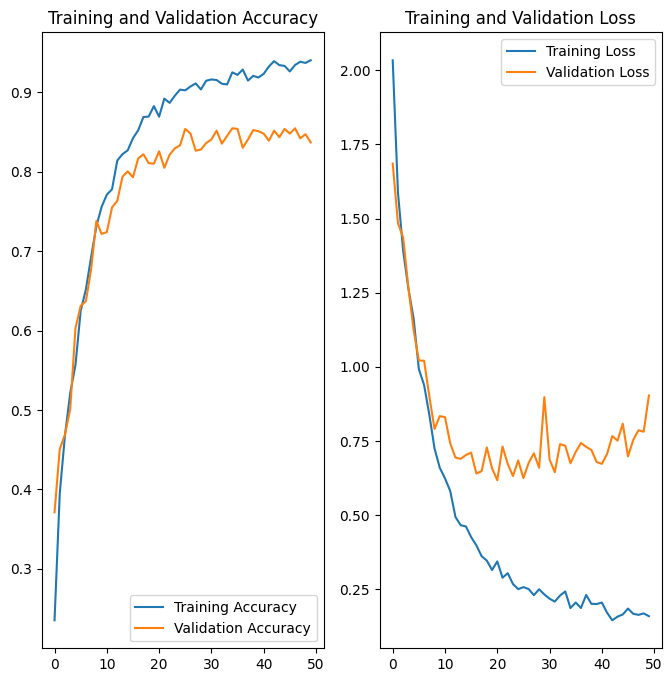

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Accuracy on training data is increased to around 85% by using Augmentor library.

The class rebalance is helped for overfitting issue.


But the Model is still overfitting(95% vs 85%), it can be solved by add more layer,neurons or adding dropout layers, and tuning the hyperparameter.
